# Multiple Linear Regression
## BoomBikes Case Study

#### Problem Statement and Business Objective:

A bike-sharing system in which bikes are made available for shared use to individuals on a short term basis for a price or free. It allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

The objective is to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

Essentially, the company wants —


- Which variables are significant in predicting the demand for shared bikes.

- How well those variables describe the bike demands
- To know the accuracy of the model.

**So interpretation is important!**

## Assumptions:-
##### Season will be interpreted as --> 1:spring,2:summer,3:fall and 4:winter
    
##### mnth will be interpreted as -->1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',  7:'Jul', 8:'Aug', 9:'Sep',10:'Oct',11:'Nov', 12:'Dec'
    
###### yr will be interpreted as --> 1:2019 & 0:2018
    
##### weekday will be interpreted as -->0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'
    
##### weather will be interpreted as --> 1:'Clear',2:'Mist_Cloudy',3:'Light_Snow',4:'Heavy_Rain'
#### Linear relationship betwwen predictor variables and target variable.
#### Multivariate normality.
#### No or little multicollinearity.
#### No auto-correlation.
#### Error terms are normally distributed with mean zero
#### Error terms are independent of each other
##### Error terms have constant variance (homoscedasticity)




### Load the libraries

In [176]:
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn
import warnings # To remove any random warnings
warnings.filterwarnings(action = 'ignore') # Commands which helps to remove the warnings
from sklearn.model_selection import train_test_split # It helps to split the data set into two part: Training and Test Data set
from sklearn.preprocessing import MinMaxScaler # It is used to scale the data variables or coloumns
import statsmodels.api as sm # Library used to build linear model
from sklearn.feature_selection import RFE # Library help in  automatic selection of featured variables
from sklearn.linear_model import LinearRegression # Library which help in building linear model but not much focuesd for statistical details like statsmodels.api
from sklearn.preprocessing import OneHotEncoder #it helps in encoding of categorical data 
from statsmodels.graphics.gofplots import qqplot
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


## Reading the data fom input csv file
We will use NumPy and Pandas libraries to read the BoomBikes Data

In [177]:
File_Path=input("Please enter the file path having details of historical data of BoomBikes") # Input File Path
BoomBikes_Data=pd.read_csv(File_Path) #Reading Data for thr provided input file in previous steps
BoomBikes_Data.head() # Checking first five row of data to get high level overview of data

Please enter the file path having details of historical data of BoomBikesE:\Machine Learning1\Booms Bike Case Study\day.csv


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Pre-processing of Data

In [178]:
#Get Statistical Information 
BoomBikes_Data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [179]:
# Get the information about data columns 
BoomBikes_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [180]:
#Get unique value for columns
BoomBikes_Data.apply(lambda x: len(x.unique()))

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [181]:
#Check for null values
BoomBikes_Data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### As observed from above data there is no null value 

In [182]:
#Renaming the columns for better and clear understanding
BoomBikes_Data=BoomBikes_Data.rename(columns={'weathersit':"weather",'yr':"year",'mnth':"month",'hum':"humidity",'cnt':"count"})
BoomBikes_Data.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [183]:
## Removing column from data

###  Removing column name "instant" because it is index which represent row position in data.It will not be helpful in data modeling and making inferences.

###  Removing column name "dteday" because most of derived column like "yr","mnth","weekday" etc.  are already present in data
Columnname_delete=["instant","dteday"]
BoomBikes_Data_Cleaned=BoomBikes_Data.drop(Columnname_delete, axis=1)
BoomBikes_Data_Cleaned.head()
BoomBikes_Data_Cleaned.columns
BoomBikes_Data_Cleaned

,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


## Exploratory Data Analysis For BoomBikes

### Visualising Numerical Variables

In [184]:
#Defining the function:-> Univariate_analysis.
def Univariate_analysis(Data,col):
        sns.set(style="darkgrid")
        fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
        ax[0].set_title("Distribution Plot")
        sns.distplot(Data[col],ax=ax[0])
        ax[1].set_title("Violin Plot")
        sns.violinplot(data =Data, x=col,ax=ax[1], inner="quartile")
        ax[2].set_title("Box Plot")
        sns.boxplot(data =Data, x=col,ax=ax[2],orient='v')
        plt.show()

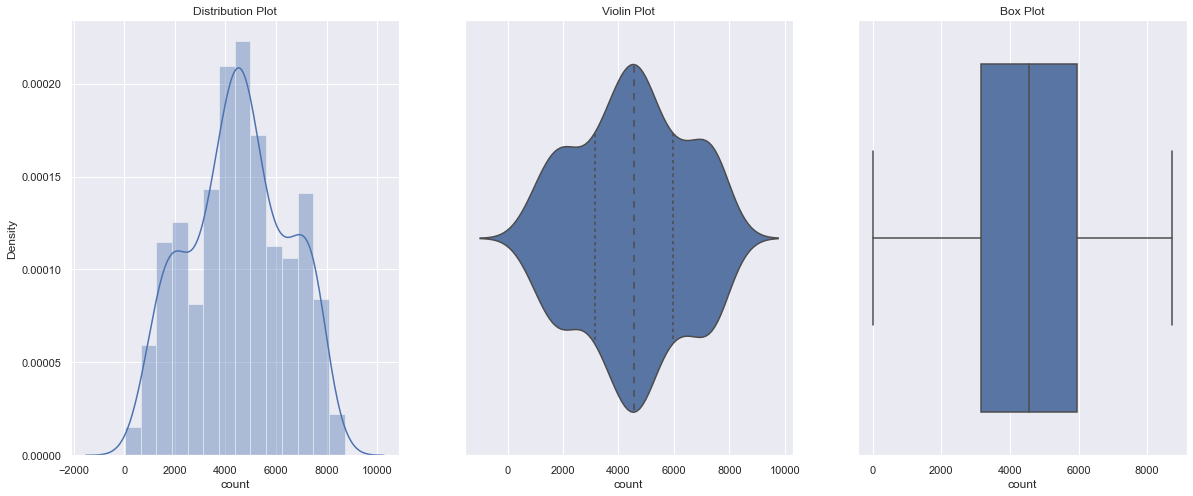

In [185]:
# Univariate analysis on column count
Univariate_analysis(Data=BoomBikes_Data,col='count')

#### Inference from above image - Data is normally distributed between 0 to 10000, mean is 4500

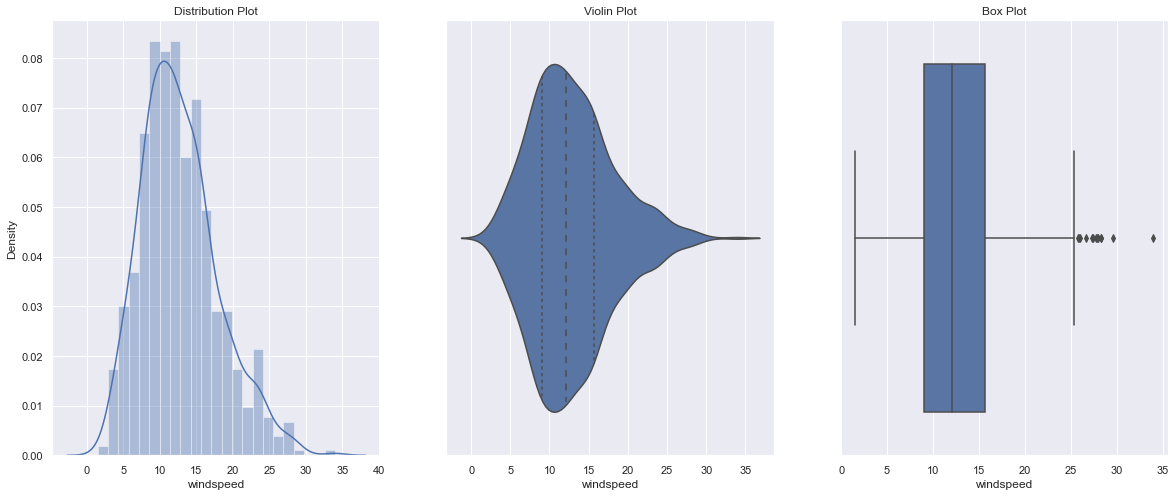

In [186]:
#Univariate analysis on windspeed

Univariate_analysis(BoomBikes_Data_Cleaned,'windspeed')

#### Inference from above plot  - windspeed column is slightly right skewed

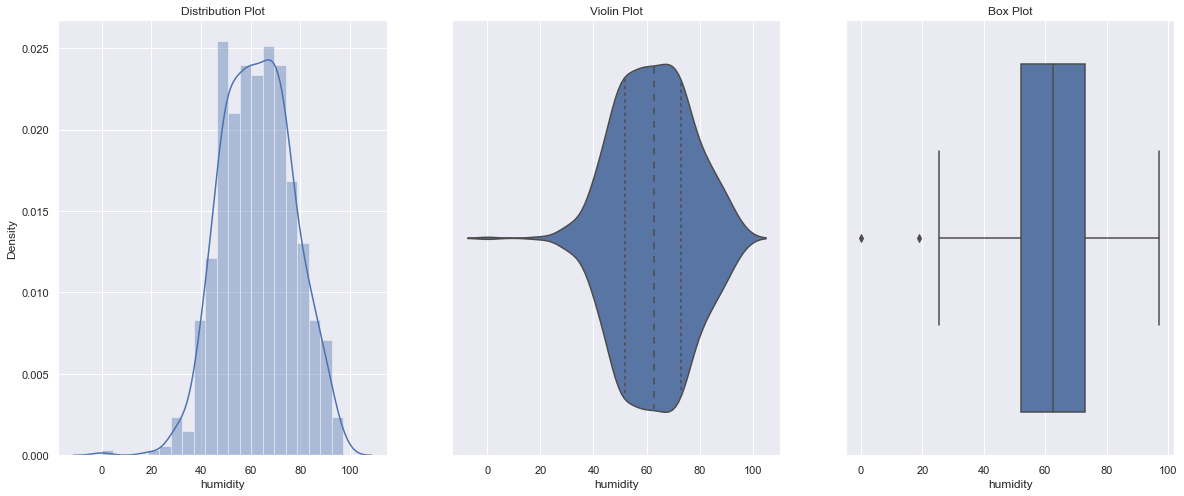

In [187]:
# Univariate analysis on column humidity
Univariate_analysis(BoomBikes_Data_Cleaned,'humidity')

#### Inference from above plot - humudity column data is right skewed normal distribution with mean of 62

[Text(0.5, 1.0, 'Count of bike during weekdays and weekend')]

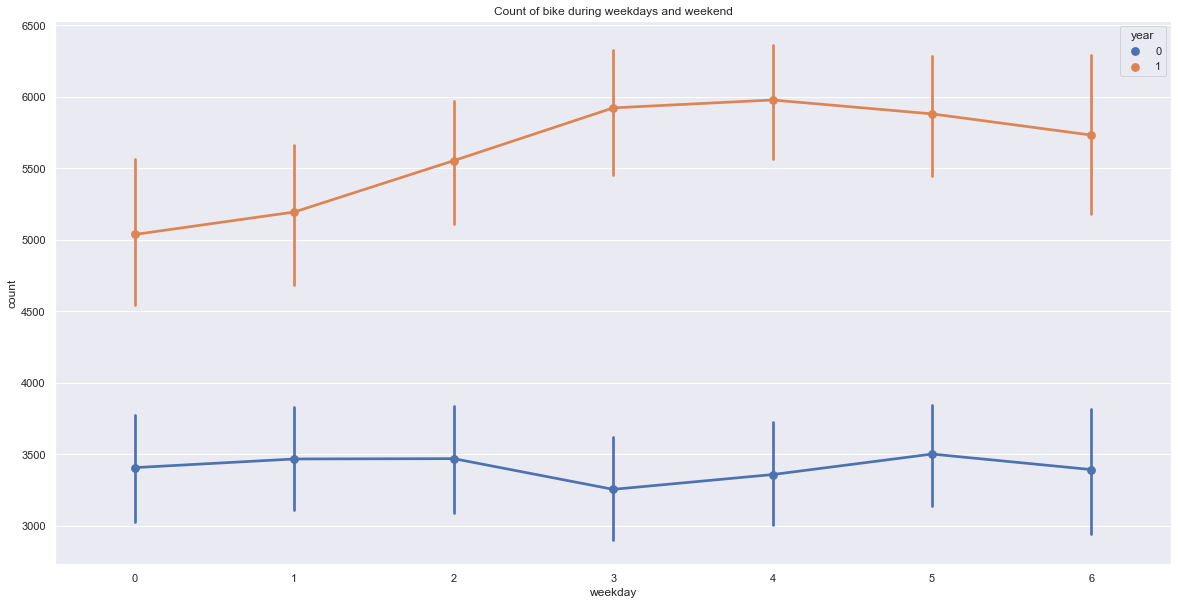

In [188]:
# Plot for Count of bike during weekdays and weekend
fix,ax=plt.subplots(figsize=(20,10))
sns.pointplot(data=BoomBikes_Data_Cleaned,x='weekday',y='count',hue='year',ax=ax)
ax.set(title="Count of bike during weekdays and weekend")

#### Inference from above plot-in the  year 2019 count of bikes booked are more compared to year 2018

[Text(0.5, 1.0, 'Count of bike during weekdays and weekend:unregisterd users')]

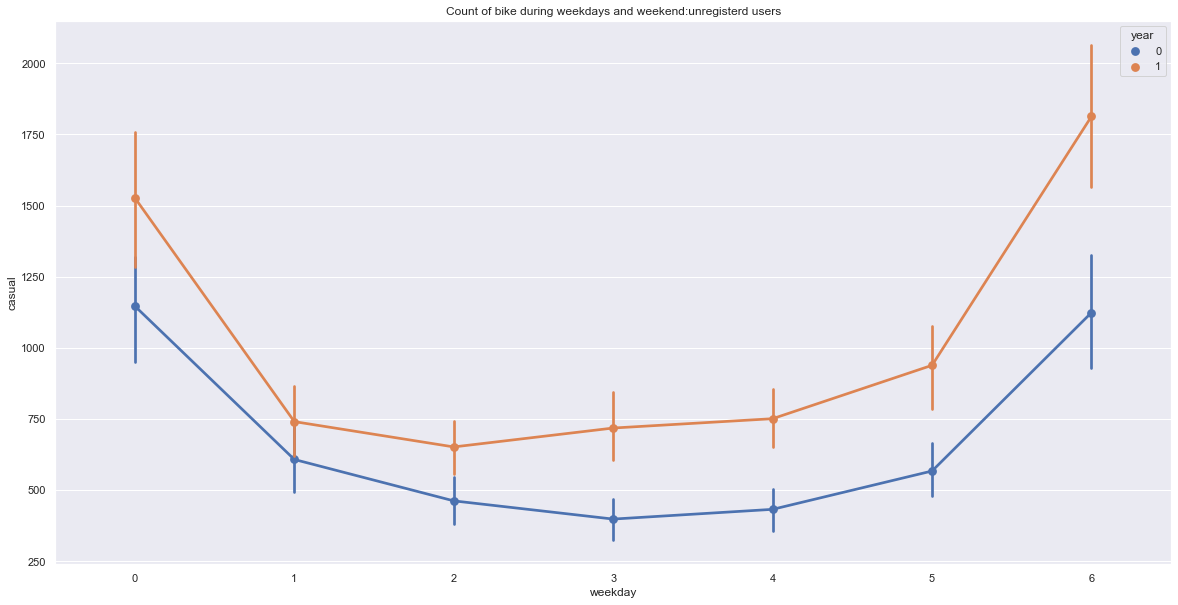

In [189]:
#plot for Count of bike during weekdays and weekend:unregisterd users
fix,ax=plt.subplots(figsize=(20,10))
sns.pointplot(data=BoomBikes_Data_Cleaned,x='weekday',y='casual',hue='year',ax=ax)
ax.set(title="Count of bike during weekdays and weekend:unregisterd users")

#### From the previous plot we already know the magnitude of people booking is more in year 2019 compared to 2018, but here in the above plot we observed the number of casual users book more as the week progresses towards the end .i.e. saturday and sunday.The traffic is very busy in BoomBikes

[Text(0.5, 1.0, 'Count of bike during weekdays and weekend:registerd users')]

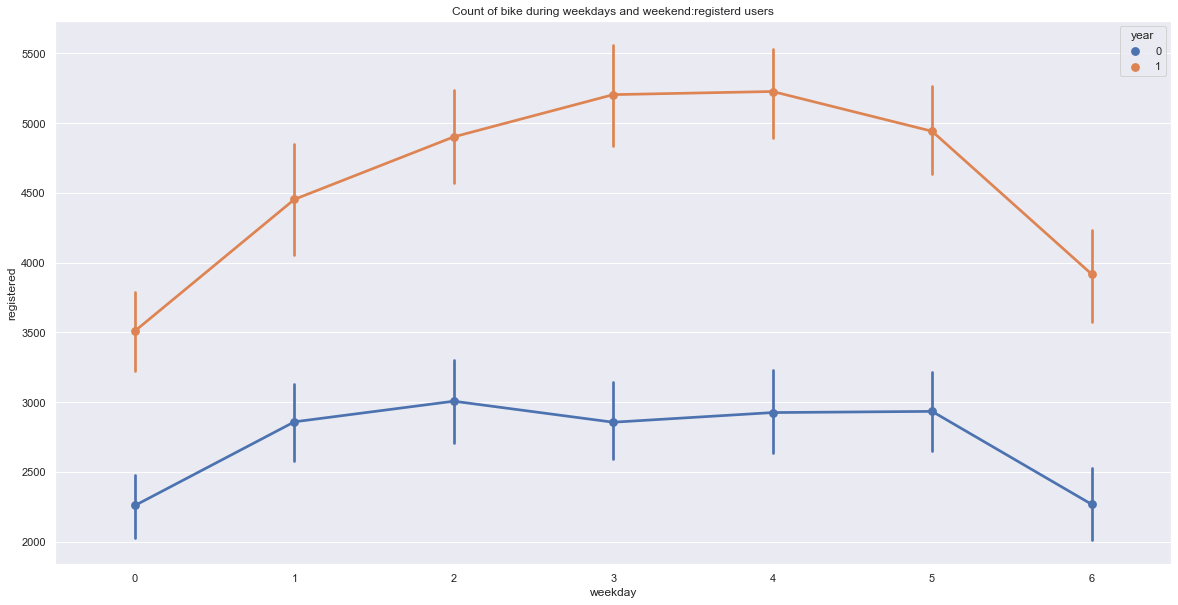

In [190]:
fix,ax=plt.subplots(figsize=(20,10))
sns.pointplot(data=BoomBikes_Data_Cleaned,x='weekday',y='registered',hue='year',ax=ax)
ax.set(title="Count of bike during weekdays and weekend:registerd users")

#### Inference from above plot-In contrast with casual users registered users book bikes more on the weekdays than the weekend

[Text(0.5, 1.0, 'Count of bike during different weather')]

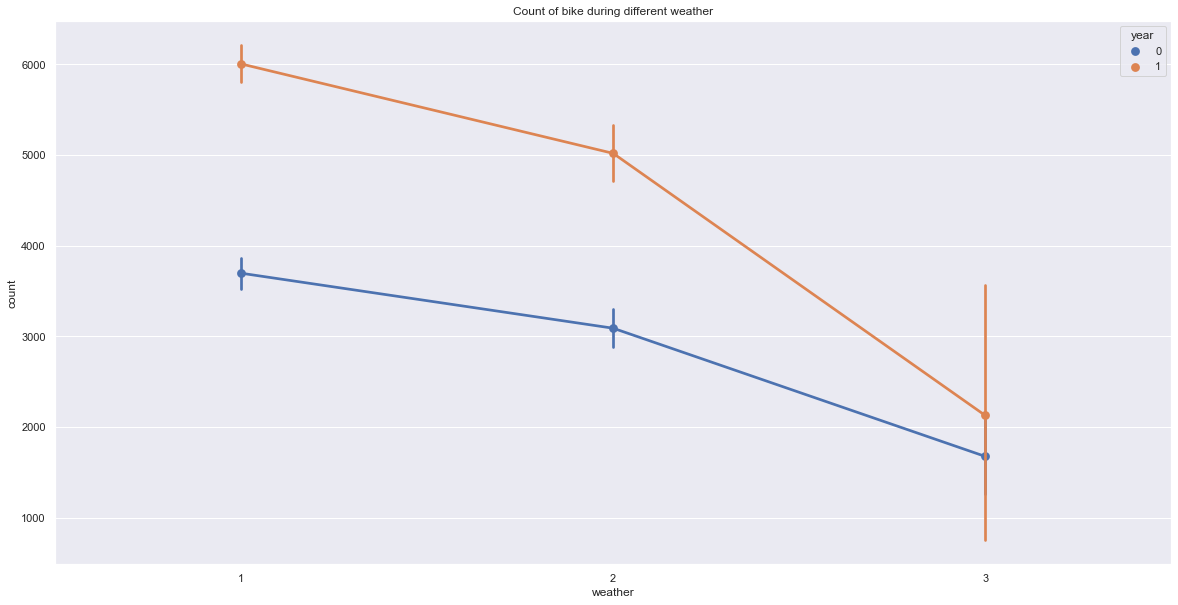

In [191]:
fix,ax=plt.subplots(figsize=(20,10))
sns.pointplot(data=BoomBikes_Data_Cleaned,x='weather',y='count',hue='year',ax=ax)
ax.set(title="Count of bike during different weather")

##### Inference from above plot-Bookings are more when weather is clear

[Text(0.5, 1.0, 'Count of bike during different months')]

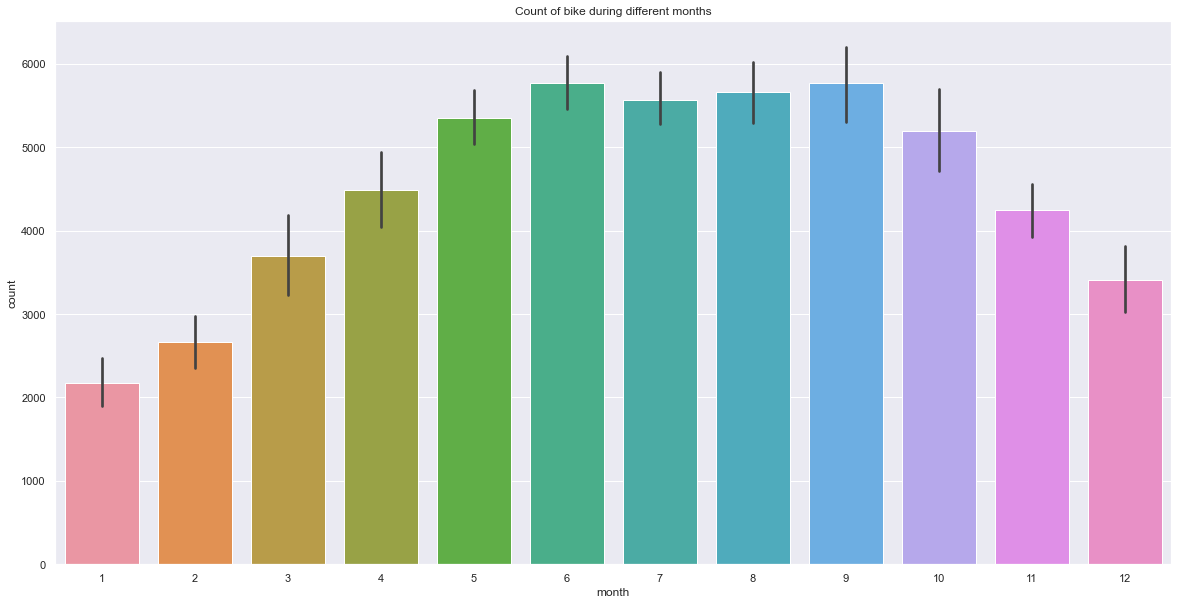

In [192]:
#Plot count of bikes book in different months
fix,ax=plt.subplots(figsize=(20,10))
sns.barplot(data=BoomBikes_Data_Cleaned,x='month',y='count',ax=ax)
ax.set(title="Count of bike during different months")

#### Inference from above plot - in start and end of month bike booking is comparatively lower then other months

<AxesSubplot:>

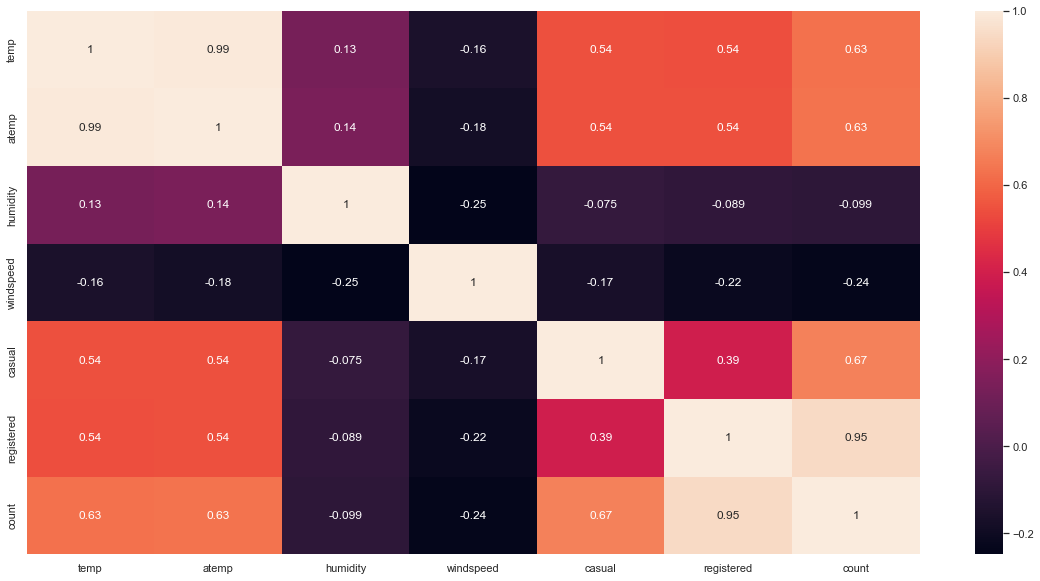

In [193]:
#Correlation Plot for continuous variables
plt.figure(figsize=(20,10))
BoomBikes_Data_Cleaned_Correlation=BoomBikes_Data_Cleaned[["temp","atemp","humidity","windspeed","casual","registered","count"]]
sns.heatmap(BoomBikes_Data_Cleaned_Correlation.corr(),annot=True)

#### Since atemp is highly correlated with temp and "casual","registered" are highly correlated with count , so deleting the column "atemp","casual","registered"
--- Also it can clearly seen that casual+registered=count

In [194]:
BoomBikes_Data_Cleaned.drop(["atemp","casual","registered"],axis=1,inplace=True) #dropping columns
BoomBikes_Data_Cleaned.head()

,season,year,month,holiday,weekday,workingday,weather,temp,humidity,windspeed,count
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


In [195]:
#Plot pair plot to find patterns and relationship
BoomBikes_Data_Cleaned_Pairpolt=BoomBikes_Data_Cleaned[["temp","humidity","windspeed","count"]]
#sns.pairplot(BoomBikes_Data_Cleaned_Pairpolt)
#plt.show()
BoomBikes_Data_Cleaned_Pairpolt.head()


,temp,humidity,windspeed,count
0,14.110847,80.5833,10.749882,985
1,14.902598,69.6087,16.652113,801
2,8.050924,43.7273,16.636703,1349
3,8.200000,59.0435,10.739832,1562
4,9.305237,43.6957,12.522300,1600


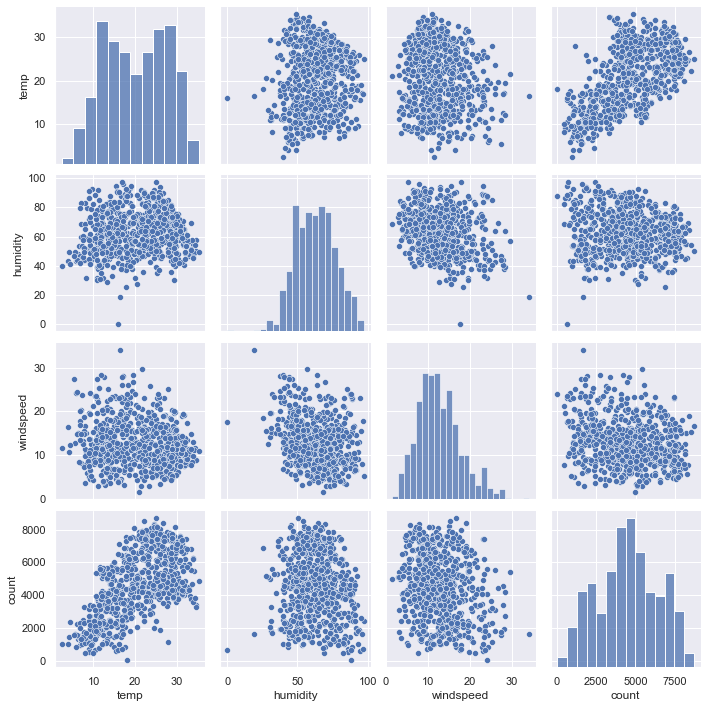

In [196]:
sns.pairplot(BoomBikes_Data_Cleaned_Pairpolt)
plt.show()

#### Inferences from above plot :- temp is showing clearly showing linear regression pattern

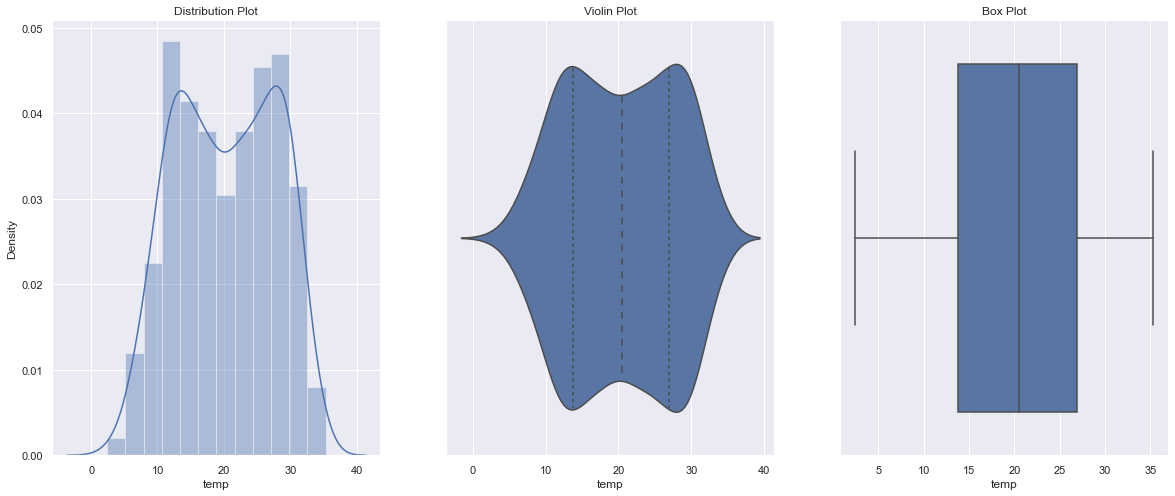

In [197]:
#Lets carry out Univariate analysis on temp
Univariate_analysis(BoomBikes_Data_Cleaned,'temp')

####  Inference - temp column data is right skewed normal distribution with mean of 20

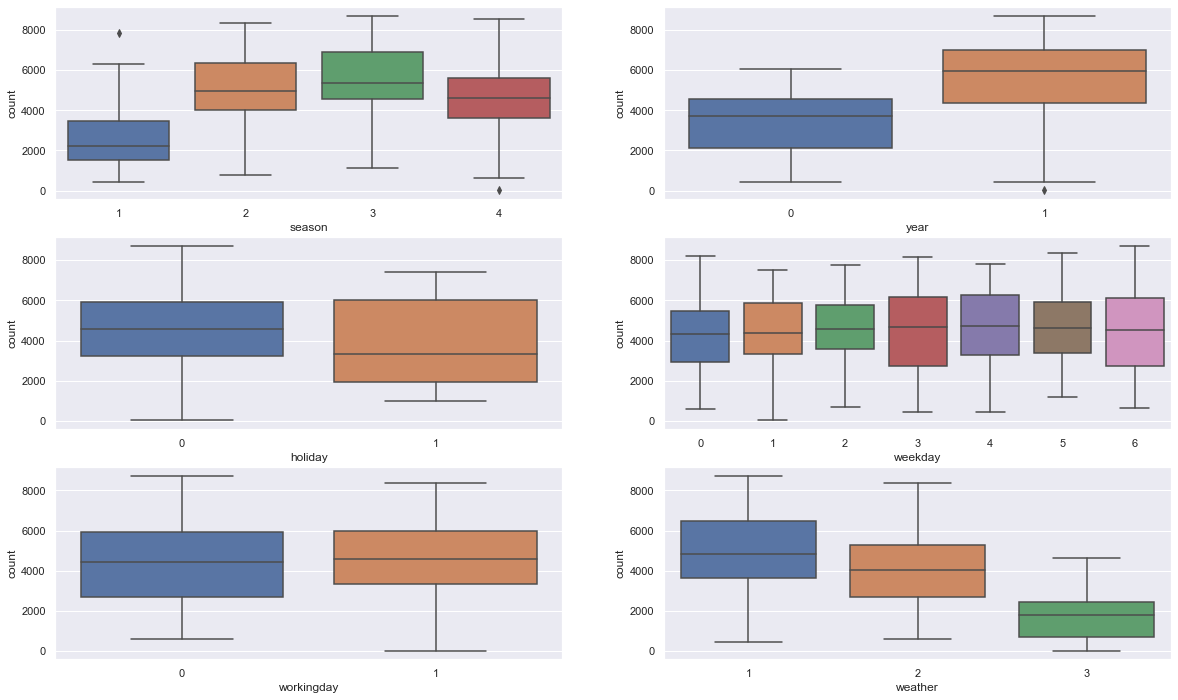

In [198]:
### Visualising Categorical Variables
plt.figure(figsize=(20, 12))
plt.subplot(3,2,1)
sns.boxplot(x = 'season', y = 'count', data = BoomBikes_Data_Cleaned)
plt.subplot(3,2,2)
sns.boxplot(x = 'year', y = 'count', data = BoomBikes_Data_Cleaned)
plt.subplot(3,2,3)
sns.boxplot(x = 'holiday', y = 'count', data = BoomBikes_Data_Cleaned)
plt.subplot(3,2,4)
sns.boxplot(x = 'weekday', y = 'count', data = BoomBikes_Data_Cleaned)
plt.subplot(3,2,5)
sns.boxplot(x = 'workingday', y = 'count', data = BoomBikes_Data_Cleaned)
plt.subplot(3,2,6)
sns.boxplot(x = 'weather', y = 'count', data = BoomBikes_Data_Cleaned)
plt.show()

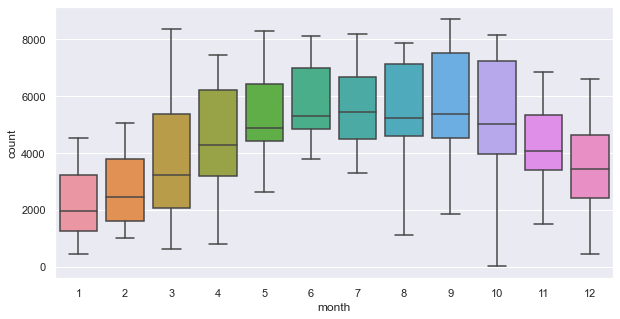

In [199]:
#Box plot for month vs count variables
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'month', y = 'count', data = BoomBikes_Data_Cleaned)
plt.show()

[Text(0.5, 1.0, 'Theoritical quantiles')]

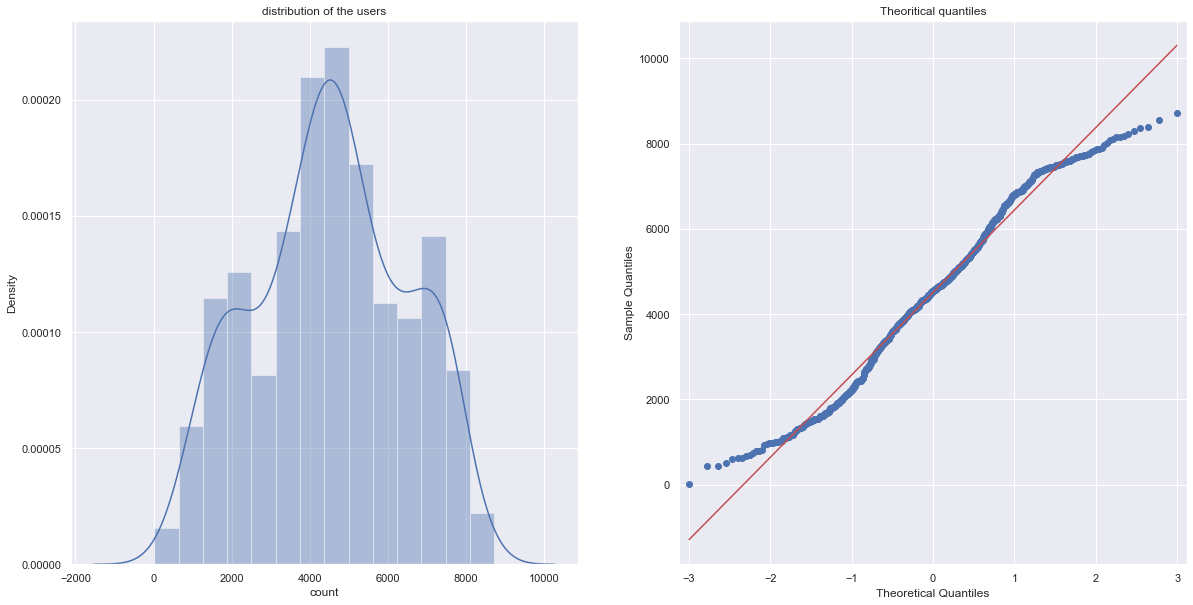

In [200]:
# Distplot and Theoritical quantiles for pattern understanding
from statsmodels.graphics.gofplots import qqplot
fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=(20,10))
sns.distplot(BoomBikes_Data_Cleaned['count'],ax=ax1)
ax1.set(title="distribution of the users")
qqplot(BoomBikes_Data_Cleaned['count'],ax=ax2,line='s')
ax2.set(title="Theoritical quantiles")

#### Inference from above plot:- The above plot is following linear regression graph

##  Format categorical column

In [201]:
#Get categorical count for season column

BoomBikes_Data_Cleaned.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [202]:
#Assign 1:spring,2:summer,3:fall and 4:winter
def assign_season(x):
    if x == 1:
        return 'spring'
    elif x == 2 :
        return 'summer'
    elif x == 3 :
        return 'fall'
    else:
        return 'winter'
    
BoomBikes_Data_Cleaned['season'] = BoomBikes_Data_Cleaned['season'].apply(assign_season)
BoomBikes_Data_Cleaned['season']

0      spring
1      spring
2      spring
3      spring
4      spring
        ...  
725    spring
726    spring
727    spring
728    spring
729    spring
Name: season, Length: 730, dtype: object

In [203]:
# Get count for all the assign values spring,summer,fall, winter and validate with previous count
BoomBikes_Data_Cleaned.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [204]:
BoomBikes_Data_Cleaned.month.value_counts() #Get count for month column

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: month, dtype: int64

In [205]:
#Assign month like 1:Jan, 2:Feb,3:Mar etc.
def assign_month(x):
    return x.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 
                  7:'Jul', 8:'Aug', 9:'Sep',10:'Oct', 11:'Nov', 12:'Dec'})

BoomBikes_Data_Cleaned['month']=BoomBikes_Data_Cleaned[['month']].apply(assign_month)
BoomBikes_Data_Cleaned['month']

0      Jan
1      Jan
2      Jan
3      Jan
4      Jan
      ... 
725    Dec
726    Dec
727    Dec
728    Dec
729    Dec
Name: month, Length: 730, dtype: object

In [206]:
# Validating the count with previous steps after assigning Jan, Feb, Mar etc. to numericals
BoomBikes_Data_Cleaned.month.value_counts()

Jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: month, dtype: int64

In [207]:
#Assign Year as 2018 and 2019
def assign_year(x):
    if x == 0:
        return '2018'
    else:
        return '2019'

BoomBikes_Data_Cleaned['year'] = BoomBikes_Data_Cleaned['year'].apply(assign_year)
BoomBikes_Data_Cleaned['year']

0      2018
1      2018
2      2018
3      2018
4      2018
       ... 
725    2019
726    2019
727    2019
728    2019
729    2019
Name: year, Length: 730, dtype: object

In [208]:
#Validating the counts after assigning 2018 and 2019 to 0 and 1
BoomBikes_Data_Cleaned.year.value_counts()

2018    365
2019    365
Name: year, dtype: int64

In [209]:
#Assign weekday as Sun, Mon, Tue, Wed ,Thu,Fri,Sat
def assign_weekday(x):
    return x.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

BoomBikes_Data_Cleaned['weekday']=BoomBikes_Data_Cleaned[['weekday']].apply(assign_weekday)
BoomBikes_Data_Cleaned['weekday']

0      Sat
1      Sun
2      Mon
3      Tue
4      Wed
      ... 
725    Thu
726    Fri
727    Sat
728    Sun
729    Mon
Name: weekday, Length: 730, dtype: object

In [210]:
#Get count for weekday column
BoomBikes_Data_Cleaned.weekday.value_counts()

Sat    105
Sun    105
Mon    105
Tue    104
Thu    104
Fri    104
Wed    103
Name: weekday, dtype: int64

In [211]:
#Assign weather as 1:'Clear',2:'Mist_Cloudy',3:'Light_Snow',4:'Heavy_Rain'
def assign_weather(x):
    return x.map({1:'Clear',2:'Mist_Cloudy',3:'Light_Snow',4:'Heavy_Rain'})

BoomBikes_Data_Cleaned['weather']= BoomBikes_Data_Cleaned[['weather']].apply(assign_weather)
BoomBikes_Data_Cleaned['weather']

0      Mist_Cloudy
1      Mist_Cloudy
2            Clear
3            Clear
4            Clear
          ...     
725    Mist_Cloudy
726    Mist_Cloudy
727    Mist_Cloudy
728          Clear
729    Mist_Cloudy
Name: weather, Length: 730, dtype: object

In [212]:
#Get count for weather
BoomBikes_Data_Cleaned.weather.value_counts()

Clear          463
Mist_Cloudy    246
Light_Snow      21
Name: weather, dtype: int64

In [213]:
# Data frame top five row view
BoomBikes_Data_Cleaned.head()

,season,year,month,holiday,weekday,workingday,weather,temp,humidity,windspeed,count
0,spring,2018,Jan,0,Sat,0,Mist_Cloudy,14.110847,80.5833,10.749882,985
1,spring,2018,Jan,0,Sun,0,Mist_Cloudy,14.902598,69.6087,16.652113,801
2,spring,2018,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,2018,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,2018,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


In [214]:
#Encoding the variables
BoomBikes_Data_Cleaned_encoding=BoomBikes_Data_Cleaned

def encoding(DataFrame, column):
    DataFrame=pd.concat([DataFrame,pd.get_dummies(DataFrame[column],prefix=column,drop_first=True)],axis=1)
    DataFrame=DataFrame.drop([column],axis=1)
    return DataFrame

Categorical_ColumnName=['season','year','month','weekday','weather']
for i in Categorical_ColumnName:
    BoomBikes_Data_Cleaned_encoding=encoding(BoomBikes_Data_Cleaned_encoding,i)

BoomBikes_Data_Cleaned_encoding.head()


,holiday,workingday,temp,humidity,windspeed,count,season_spring,season_summer,season_winter,year_2019,...,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weather_Light_Snow,weather_Mist_Cloudy
0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [215]:
BoomBikes_Data_Cleaned_encoding.columns #Get column names

Index(['holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'count',
       'season_spring', 'season_summer', 'season_winter', 'year_2019',
       'month_Aug', 'month_Dec', 'month_Feb', 'month_Jan', 'month_Jul',
       'month_Jun', 'month_Mar', 'month_May', 'month_Nov', 'month_Oct',
       'month_Sep', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed', 'weather_Light_Snow',
       'weather_Mist_Cloudy'],
      dtype='object')

## Splitting the data into test and training set

In [216]:
# Getting the test and train data
np.random.seed(0)
BoomBikes_Data_train, BoomBikes_Data_test = train_test_split(BoomBikes_Data_Cleaned_encoding, train_size = 0.7, test_size = 0.3, random_state = 100)


In [217]:
#checking shape of train and test dataframe
print("Train dataframe : ",BoomBikes_Data_train.shape)
print("Test dataframe : ",BoomBikes_Data_test.shape)

Train dataframe :  (510, 29)
Test dataframe :  (219, 29)


## Rescale the numerical variable so they can come under one measure
#### We will rescale windspeed, humidity,temp and count 

In [218]:
#Using standard scaler of scaling
scaler = StandardScaler()

In [219]:
#We will apply scaller to all columns except dummy variables
scale_columns=['count','temp','humidity','windspeed']
BoomBikes_Data_train[scale_columns] = scaler.fit_transform(BoomBikes_Data_train[scale_columns])


In [220]:
# Top five row view of training fit transform data
BoomBikes_Data_train.head()

,holiday,workingday,temp,humidity,windspeed,count,season_spring,season_summer,season_winter,year_2019,...,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weather_Light_Snow,weather_Mist_Cloudy
653,0,1,-0.121335,-0.514725,-0.117752,1.562685,0,0,1,1,...,1,0,0,0,0,0,1,0,0,0
576,0,1,1.231731,0.516433,-0.330615,1.399629,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
426,0,0,-0.420478,-0.069854,-0.385694,-0.215554,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
728,0,0,-1.294913,-1.045032,2.018143,-1.379511,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
482,0,0,-0.627580,-1.000840,-0.779889,-0.136589,0,1,0,1,...,0,0,0,1,0,0,0,0,0,1


In [221]:
## Dividing into x set and y set for model building
y_train = BoomBikes_Data_train.pop('count')
X_train = BoomBikes_Data_train

In [222]:
#View of y_train data
y_train

653    1.562685
576    1.399629
426   -0.215554
728   -1.379511
482   -0.136589
         ...   
526    1.116587
578    1.422703
53    -1.317467
350   -0.895981
79    -1.235426
Name: count, Length: 510, dtype: float64

In [223]:
#view of x_train data
X_train.tail()

,holiday,workingday,temp,humidity,windspeed,season_spring,season_summer,season_winter,year_2019,month_Aug,...,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weather_Light_Snow,weather_Mist_Cloudy
526,0,1,1.273152,-0.305544,0.205320,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,1
578,0,1,1.448040,0.201190,-0.787759,0,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
53,0,1,-1.483204,-1.471329,-1.234384,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
350,0,0,-1.281106,-0.497048,0.654645,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
79,0,1,-0.330635,0.751352,1.232757,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1


## Building model from Sklearn

### Model-1

In [224]:
# Linear regression with RFE
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=20)             # Executing RFE
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('year_2019', True, 1),
 ('month_Aug', True, 1),
 ('month_Dec', True, 1),
 ('month_Feb', True, 1),
 ('month_Jan', True, 1),
 ('month_Jul', True, 1),
 ('month_Jun', False, 8),
 ('month_Mar', False, 9),
 ('month_May', True, 1),
 ('month_Nov', True, 1),
 ('month_Oct', False, 5),
 ('month_Sep', True, 1),
 ('weekday_Mon', False, 3),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', False, 2),
 ('weekday_Thu', False, 6),
 ('weekday_Tue', False, 4),
 ('weekday_Wed', False, 7),
 ('weather_Light_Snow', True, 1),
 ('weather_Mist_Cloudy', True, 1)]

## Building model using statsmodel, for the detailed statistics

In [225]:
# adding constant to train data
X_train_rfe = sm.add_constant(X_train)
X_train_rfe.head()

,const,holiday,workingday,temp,humidity,windspeed,season_spring,season_summer,season_winter,year_2019,...,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weather_Light_Snow,weather_Mist_Cloudy
653,1.0,0,1,-0.121335,-0.514725,-0.117752,0,0,1,1,...,1,0,0,0,0,0,1,0,0,0
576,1.0,0,1,1.231731,0.516433,-0.330615,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
426,1.0,0,0,-0.420478,-0.069854,-0.385694,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
728,1.0,0,0,-1.294913,-1.045032,2.018143,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
482,1.0,0,0,-0.627580,-1.000840,-0.779889,0,1,0,1,...,0,0,0,1,0,0,0,0,0,1


In [226]:
# Linear regression using ordinary least square model
lm = sm.OLS(y_train,X_train_rfe).fit()

In [227]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          8.74e-182
Time:                        15:14:31   Log-Likelihood:                -234.21
No. Observations:                 510   AIC:                             524.4
Df Residuals:                     482   BIC:                             643.0
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.4401    

In [228]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
23,weekday_Sun,inf
2,workingday,inf
22,weekday_Sat,inf
1,holiday,inf
6,season_spring,10.79
8,season_winter,9.50
7,season_summer,8.29
3,temp,7.12
18,month_Nov,6.80
19,month_Oct,6.59


## Dropping variables based on p values. We will remove all the variables one by one having p>=0.05 and VIF>5

#### Model-2

In [229]:
# since month has high p value in above statistical summary report, we will drop this column
X_train = BoomBikes_Data_train.drop("month_Mar",axis=1)
X_train.head()

,holiday,workingday,temp,humidity,windspeed,season_spring,season_summer,season_winter,year_2019,month_Aug,...,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weather_Light_Snow,weather_Mist_Cloudy
653,0,1,-0.121335,-0.514725,-0.117752,0,0,1,1,0,...,1,0,0,0,0,0,1,0,0,0
576,0,1,1.231731,0.516433,-0.330615,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
426,0,0,-0.420478,-0.069854,-0.385694,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
728,0,0,-1.294913,-1.045032,2.018143,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
482,0,0,-0.627580,-1.000840,-0.779889,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [230]:
# Add the constant for trained data
X_train_rfe1 = sm.add_constant(X_train)
X_train_rfe1.head()

,const,holiday,workingday,temp,humidity,windspeed,season_spring,season_summer,season_winter,year_2019,...,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weather_Light_Snow,weather_Mist_Cloudy
653,1.0,0,1,-0.121335,-0.514725,-0.117752,0,0,1,1,...,1,0,0,0,0,0,1,0,0,0
576,1.0,0,1,1.231731,0.516433,-0.330615,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
426,1.0,0,0,-0.420478,-0.069854,-0.385694,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
728,1.0,0,0,-1.294913,-1.045032,2.018143,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
482,1.0,0,0,-0.627580,-1.000840,-0.779889,0,1,0,1,...,0,0,0,1,0,0,0,0,0,1


In [231]:
X_train_rfe1.columns # Get column names

Index(['const', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'year_2019',
       'month_Aug', 'month_Dec', 'month_Feb', 'month_Jan', 'month_Jul',
       'month_Jun', 'month_May', 'month_Nov', 'month_Oct', 'month_Sep',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed', 'weather_Light_Snow',
       'weather_Mist_Cloudy'],
      dtype='object')

In [232]:
lm = sm.OLS(y_train,X_train_rfe1).fit() # Train model using Ordianry Least Square module

In [233]:
#Get the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          8.33e-183
Time:                        15:14:46   Log-Likelihood:                -234.22
No. Observations:                 510   AIC:                             522.4
Df Residuals:                     483   BIC:                             636.8
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.4381    

In [234]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
22,weekday_Sun,inf
2,workingday,inf
21,weekday_Sat,inf
1,holiday,inf
6,season_spring,9.69
8,season_winter,9.18
7,season_summer,7.98
3,temp,6.93
10,month_Aug,5.71
14,month_Jul,5.14


### Model-3


In [235]:
# Since month_Jun has p value grater then 0.05, so we will delete it 
X_train=X_train.drop("month_Jun",axis=1)
X_train.head()

,holiday,workingday,temp,humidity,windspeed,season_spring,season_summer,season_winter,year_2019,month_Aug,...,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weather_Light_Snow,weather_Mist_Cloudy
653,0,1,-0.121335,-0.514725,-0.117752,0,0,1,1,0,...,1,0,0,0,0,0,1,0,0,0
576,0,1,1.231731,0.516433,-0.330615,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
426,0,0,-0.420478,-0.069854,-0.385694,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
728,0,0,-1.294913,-1.045032,2.018143,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
482,0,0,-0.627580,-1.000840,-0.779889,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [236]:
X_train.columns # Get column names

Index(['holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'year_2019',
       'month_Aug', 'month_Dec', 'month_Feb', 'month_Jan', 'month_Jul',
       'month_May', 'month_Nov', 'month_Oct', 'month_Sep', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed', 'weather_Light_Snow', 'weather_Mist_Cloudy'],
      dtype='object')

In [237]:
X_train_rfe2 = sm.add_constant(X_train) # Add constant to train data
lm = sm.OLS(y_train,X_train_rfe2).fit() #fit the train data
print(lm.summary()) #Get the summary of our linear model

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     112.6
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          7.84e-184
Time:                        15:14:55   Log-Likelihood:                -234.23
No. Observations:                 510   AIC:                             520.5
Df Residuals:                     484   BIC:                             630.5
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.4447    

In [238]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
20,weekday_Sat,inf
21,weekday_Sun,inf
2,workingday,inf
1,holiday,inf
8,season_winter,8.86
6,season_spring,8.72
7,season_summer,7.44
3,temp,4.96
16,month_Nov,4.76
17,month_Oct,4.51


## Model-4

In [239]:
# since month_Oct has p value greater then 0.05 we will delete this column
X_train=X_train.drop("month_Oct",axis=1) #Delete the month_Oct columns
X_train.head()

,holiday,workingday,temp,humidity,windspeed,season_spring,season_summer,season_winter,year_2019,month_Aug,...,month_Nov,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weather_Light_Snow,weather_Mist_Cloudy
653,0,1,-0.121335,-0.514725,-0.117752,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
576,0,1,1.231731,0.516433,-0.330615,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
426,0,0,-0.420478,-0.069854,-0.385694,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
728,0,0,-1.294913,-1.045032,2.018143,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
482,0,0,-0.627580,-1.000840,-0.779889,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [240]:
X_train_rfe3 = sm.add_constant(X_train) # Add constant to train data
lm = sm.OLS(y_train,X_train_rfe3).fit() #fit the train data
print(lm.summary()) #Get the summary of our linear model

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     117.5
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          7.40e-185
Time:                        15:14:59   Log-Likelihood:                -234.26
No. Observations:                 510   AIC:                             518.5
Df Residuals:                     485   BIC:                             624.4
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.4357    

In [241]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
19,weekday_Sat,inf
2,workingday,inf
1,holiday,inf
20,weekday_Sun,inf
6,season_spring,8.55
7,season_summer,6.58
8,season_winter,6.29
3,temp,4.93
10,month_Aug,3.17
14,month_Jul,2.81


## Model-5

In [242]:
#Since weekday_Wed column has p value greater then 0.05, so we will delete this column
X_train=X_train.drop("weekday_Wed",axis=1) #Delete the weekday_Wed columns
X_train.head()

,holiday,workingday,temp,humidity,windspeed,season_spring,season_summer,season_winter,year_2019,month_Aug,...,month_May,month_Nov,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weather_Light_Snow,weather_Mist_Cloudy
653,0,1,-0.121335,-0.514725,-0.117752,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
576,0,1,1.231731,0.516433,-0.330615,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
426,0,0,-0.420478,-0.069854,-0.385694,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
728,0,0,-1.294913,-1.045032,2.018143,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
482,0,0,-0.627580,-1.000840,-0.779889,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [243]:
X_train_rfe4 = sm.add_constant(X_train) # Add constant to train data
lm = sm.OLS(y_train,X_train_rfe4).fit() #fit the train data
print(lm.summary()) #Get the summary of our linear model

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.8
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          7.06e-186
Time:                        15:15:04   Log-Likelihood:                -234.33
No. Observations:                 510   AIC:                             516.7
Df Residuals:                     486   BIC:                             618.3
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.4407    

In [244]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,inf
20,weekday_Sun,inf
19,weekday_Sat,inf
1,holiday,inf
6,season_spring,8.55
7,season_summer,6.57
8,season_winter,6.29
3,temp,4.92
10,month_Aug,3.17
14,month_Jul,2.81


## Models-6

In [245]:
#Since weekday_Thu column has p value greater then 0.05, so we will delete this column
X_train=X_train.drop("weekday_Thu",axis=1) #Delete the weekday_Thu columns
X_train.head()

,holiday,workingday,temp,humidity,windspeed,season_spring,season_summer,season_winter,year_2019,month_Aug,...,month_Jul,month_May,month_Nov,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Tue,weather_Light_Snow,weather_Mist_Cloudy
653,0,1,-0.121335,-0.514725,-0.117752,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
576,0,1,1.231731,0.516433,-0.330615,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
426,0,0,-0.420478,-0.069854,-0.385694,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
728,0,0,-1.294913,-1.045032,2.018143,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
482,0,0,-0.627580,-1.000840,-0.779889,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,1


In [246]:

X_train_rfe5 = sm.add_constant(X_train) # Add constant to train data
lm = sm.OLS(y_train,X_train_rfe5).fit() #fit the train data
print(lm.summary()) #Get the summary of our linear model

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     128.6
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          6.87e-187
Time:                        15:15:08   Log-Likelihood:                -234.45
No. Observations:                 510   AIC:                             514.9
Df Residuals:                     487   BIC:                             612.3
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.4453    

In [247]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,inf
20,weekday_Sun,inf
19,weekday_Sat,inf
1,holiday,inf
6,season_spring,8.55
7,season_summer,6.57
8,season_winter,6.29
3,temp,4.92
10,month_Aug,3.17
14,month_Jul,2.80


## Models-7

In [248]:
#Since month_Aug column has p value greater then 0.05, so we will delete this column
X_train=X_train.drop("month_Aug",axis=1) #Delete the month_Aug columns
X_train.head()
             

,holiday,workingday,temp,humidity,windspeed,season_spring,season_summer,season_winter,year_2019,month_Dec,...,month_Jul,month_May,month_Nov,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Tue,weather_Light_Snow,weather_Mist_Cloudy
653,0,1,-0.121335,-0.514725,-0.117752,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
576,0,1,1.231731,0.516433,-0.330615,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
426,0,0,-0.420478,-0.069854,-0.385694,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
728,0,0,-1.294913,-1.045032,2.018143,1,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0
482,0,0,-0.627580,-1.000840,-0.779889,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,1


In [249]:

X_train_rfe6 = sm.add_constant(X_train) # Add constant to train data
lm = sm.OLS(y_train,X_train_rfe6).fit() #fit the train data
print(lm.summary()) #Get the summary of our linear model

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     134.9
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          7.12e-188
Time:                        15:15:12   Log-Likelihood:                -234.66
No. Observations:                 510   AIC:                             513.3
Df Residuals:                     488   BIC:                             606.5
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.4101    

In [250]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,inf
19,weekday_Sun,inf
18,weekday_Sat,inf
1,holiday,inf
6,season_spring,5.80
3,temp,4.90
8,season_winter,3.88
7,season_summer,3.49
12,month_Jan,2.38
4,humidity,1.98


## Models-8

In [251]:
#Since weekday_Tue column has p value greater then 0.05, so we will delete this column
X_train=X_train.drop("weekday_Tue",axis=1) #Delete the weekday_Tue columns
X_train.head()
             

,holiday,workingday,temp,humidity,windspeed,season_spring,season_summer,season_winter,year_2019,month_Dec,...,month_Jan,month_Jul,month_May,month_Nov,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weather_Light_Snow,weather_Mist_Cloudy
653,0,1,-0.121335,-0.514725,-0.117752,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
576,0,1,1.231731,0.516433,-0.330615,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
426,0,0,-0.420478,-0.069854,-0.385694,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
728,0,0,-1.294913,-1.045032,2.018143,1,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
482,0,0,-0.627580,-1.000840,-0.779889,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [252]:

X_train_rfe7 = sm.add_constant(X_train) # Add constant to train data
lm = sm.OLS(y_train,X_train_rfe7).fit() #fit the train data
print(lm.summary()) #Get the summary of our linear model

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     141.5
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          1.09e-188
Time:                        15:15:16   Log-Likelihood:                -235.30
No. Observations:                 510   AIC:                             512.6
Df Residuals:                     489   BIC:                             601.5
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.4153    

In [253]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe7
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,inf
19,weekday_Sun,inf
18,weekday_Sat,inf
1,holiday,inf
6,season_spring,5.80
3,temp,4.90
8,season_winter,3.88
7,season_summer,3.49
12,month_Jan,2.38
4,humidity,1.98


## Model-9

In [254]:
#Since workingday column has p value greater then 0.05, so we will delete this column
X_train=X_train.drop("workingday",axis=1) #Delete the workingday columns
X_train.head()

,holiday,temp,humidity,windspeed,season_spring,season_summer,season_winter,year_2019,month_Dec,month_Feb,month_Jan,month_Jul,month_May,month_Nov,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weather_Light_Snow,weather_Mist_Cloudy
653,0,-0.121335,-0.514725,-0.117752,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
576,0,1.231731,0.516433,-0.330615,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
426,0,-0.420478,-0.069854,-0.385694,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
728,0,-1.294913,-1.045032,2.018143,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0
482,0,-0.627580,-1.000840,-0.779889,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1


In [255]:

X_train_rfe8 = sm.add_constant(X_train) # Add constant to train data
lm = sm.OLS(y_train,X_train_rfe8).fit() #fit the train data
print(lm.summary()) #Get the summary of our linear model

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     141.5
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          1.09e-188
Time:                        15:15:20   Log-Likelihood:                -235.30
No. Observations:                 510   AIC:                             512.6
Df Residuals:                     489   BIC:                             601.5
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.3804    

In [256]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe8
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,16.30
5,season_spring,5.80
2,temp,4.90
7,season_winter,3.88
6,season_summer,3.49
11,month_Jan,2.38
3,humidity,1.98
10,month_Feb,1.87
14,month_Nov,1.81
9,month_Dec,1.66


## Model-10

In [257]:
#Since weekday_Sat column has p value greater then 0.05, so we will delete this column
X_train=X_train.drop("weekday_Sat",axis=1) #Delete the weekday_Sat columns
X_train.head()

,holiday,temp,humidity,windspeed,season_spring,season_summer,season_winter,year_2019,month_Dec,month_Feb,month_Jan,month_Jul,month_May,month_Nov,month_Sep,weekday_Mon,weekday_Sun,weather_Light_Snow,weather_Mist_Cloudy
653,0,-0.121335,-0.514725,-0.117752,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
576,0,1.231731,0.516433,-0.330615,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
426,0,-0.420478,-0.069854,-0.385694,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
728,0,-1.294913,-1.045032,2.018143,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0
482,0,-0.627580,-1.000840,-0.779889,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1


In [258]:

X_train_rfe9 = sm.add_constant(X_train) # Add constant to train data
lm = sm.OLS(y_train,X_train_rfe9).fit() #fit the train data
print(lm.summary()) #Get the summary of our linear model

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     149.1
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          1.13e-189
Time:                        15:15:23   Log-Likelihood:                -235.56
No. Observations:                 510   AIC:                             511.1
Df Residuals:                     490   BIC:                             595.8
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.3728    

In [259]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe9
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,15.92
5,season_spring,5.80
2,temp,4.89
7,season_winter,3.87
6,season_summer,3.49
11,month_Jan,2.38
3,humidity,1.97
10,month_Feb,1.87
14,month_Nov,1.81
9,month_Dec,1.66


## Model-11


In [260]:
#Since weekday_Mon column has p value greater then 0.05, so we will delete this column
X_train=X_train.drop("weekday_Mon",axis=1) #Delete the weekday_Mon columns
X_train.head()

,holiday,temp,humidity,windspeed,season_spring,season_summer,season_winter,year_2019,month_Dec,month_Feb,month_Jan,month_Jul,month_May,month_Nov,month_Sep,weekday_Sun,weather_Light_Snow,weather_Mist_Cloudy
653,0,-0.121335,-0.514725,-0.117752,0,0,1,1,0,0,0,0,0,0,0,0,0,0
576,0,1.231731,0.516433,-0.330615,0,0,0,1,0,0,0,1,0,0,0,0,0,0
426,0,-0.420478,-0.069854,-0.385694,1,0,0,1,0,0,0,0,0,0,0,0,0,1
728,0,-1.294913,-1.045032,2.018143,1,0,0,1,1,0,0,0,0,0,0,1,0,0
482,0,-0.627580,-1.000840,-0.779889,0,1,0,1,0,0,0,0,0,0,0,0,0,1


In [261]:

X_train_rfe10 = sm.add_constant(X_train) # Add constant to train data
lm = sm.OLS(y_train,X_train_rfe10).fit() #fit the train data
print(lm.summary()) #Get the summary of our linear model

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     157.1
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          1.96e-190
Time:                        15:15:27   Log-Likelihood:                -236.40
No. Observations:                 510   AIC:                             510.8
Df Residuals:                     491   BIC:                             591.2
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.3841    

In [262]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe10
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,15.65
5,season_spring,5.79
2,temp,4.88
7,season_winter,3.87
6,season_summer,3.49
11,month_Jan,2.38
3,humidity,1.97
10,month_Feb,1.87
14,month_Nov,1.81
9,month_Dec,1.65


# Model-12

In [263]:
#Since month_May column has p value greater then 0.05, so we will delete this column
X_train=X_train.drop("month_May",axis=1) #Delete the month_May columns
X_train.head()

,holiday,temp,humidity,windspeed,season_spring,season_summer,season_winter,year_2019,month_Dec,month_Feb,month_Jan,month_Jul,month_Nov,month_Sep,weekday_Sun,weather_Light_Snow,weather_Mist_Cloudy
653,0,-0.121335,-0.514725,-0.117752,0,0,1,1,0,0,0,0,0,0,0,0,0
576,0,1.231731,0.516433,-0.330615,0,0,0,1,0,0,0,1,0,0,0,0,0
426,0,-0.420478,-0.069854,-0.385694,1,0,0,1,0,0,0,0,0,0,0,0,1
728,0,-1.294913,-1.045032,2.018143,1,0,0,1,1,0,0,0,0,0,1,0,0
482,0,-0.627580,-1.000840,-0.779889,0,1,0,1,0,0,0,0,0,0,0,0,1


In [264]:

X_train_rfe11 = sm.add_constant(X_train) # Add constant to train data
lm = sm.OLS(y_train,X_train_rfe11).fit() #fit the train data
print(lm.summary()) #Get the summary of our linear model

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     165.9
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          4.04e-191
Time:                        15:15:30   Log-Likelihood:                -237.43
No. Observations:                 510   AIC:                             510.9
Df Residuals:                     492   BIC:                             587.1
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.3936    

In [265]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe11
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,15.50
5,season_spring,5.69
2,temp,4.73
7,season_winter,3.84
6,season_summer,2.81
11,month_Jan,2.37
3,humidity,1.94
10,month_Feb,1.86
13,month_Nov,1.80
9,month_Dec,1.65


# Model-13

In [266]:

#Since month_Feb column has p value greater then 0.05, so we will delete this column
X_train=X_train.drop("month_Feb",axis=1) #Delete the month_Feb columns
X_train.head()

,holiday,temp,humidity,windspeed,season_spring,season_summer,season_winter,year_2019,month_Dec,month_Jan,month_Jul,month_Nov,month_Sep,weekday_Sun,weather_Light_Snow,weather_Mist_Cloudy
653,0,-0.121335,-0.514725,-0.117752,0,0,1,1,0,0,0,0,0,0,0,0
576,0,1.231731,0.516433,-0.330615,0,0,0,1,0,0,1,0,0,0,0,0
426,0,-0.420478,-0.069854,-0.385694,1,0,0,1,0,0,0,0,0,0,0,1
728,0,-1.294913,-1.045032,2.018143,1,0,0,1,1,0,0,0,0,1,0,0
482,0,-0.627580,-1.000840,-0.779889,0,1,0,1,0,0,0,0,0,0,0,1


In [267]:

X_train_rfe12 = sm.add_constant(X_train) # Add constant to train data
lm = sm.OLS(y_train,X_train_rfe12).fit() #fit the train data
print(lm.summary()) #Get the summary of our linear model

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     175.5
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          1.11e-191
Time:                        15:15:33   Log-Likelihood:                -238.79
No. Observations:                 510   AIC:                             511.6
Df Residuals:                     493   BIC:                             583.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.4109    

In [268]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe12
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,15.13
5,season_spring,5.27
2,temp,4.43
7,season_winter,3.83
6,season_summer,2.76
3,humidity,1.94
12,month_Nov,1.76
10,month_Jan,1.68
16,weather_Mist_Cloudy,1.58
9,month_Dec,1.50


####  Model 13 is the final model because all the variable has p value less than 0.05 and VIF<5 except for season_spring . VIF  for season_spring is just crossed 5 but at the same time coefficient is negative (-0.2724), so we can take into consideration

# # Residual analysis on the train data

Text(0.5, 0, 'Errors')

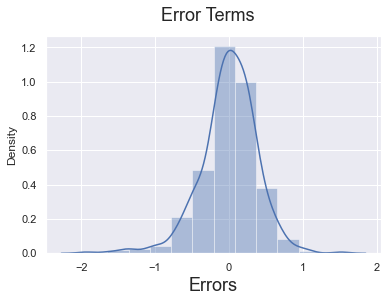

In [269]:
y_train_pred = lm.predict(X_train_rfe12) # Predict the train value for y_train
fig = plt.figure() #control figure size
sns.distplot((y_train - y_train_pred), bins = 12) #Plot the histogram of the error terms
fig.suptitle('Error Terms', fontsize = 18)
plt.xlabel('Errors', fontsize = 18)


## Making Predictions Using the Final Model(Model 13)

In [270]:
numeric_columns=['count','temp','humidity','windspeed']
BoomBikes_Data_test[numeric_columns] = scaler.transform(BoomBikes_Data_test[numeric_columns])
BoomBikes_Data_test.describe()

,holiday,workingday,temp,humidity,windspeed,count,season_spring,season_summer,season_winter,year_2019,...,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weather_Light_Snow,weather_Mist_Cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.036530,0.698630,0.096083,-0.081388,-0.043731,0.031073,0.255708,0.264840,0.232877,0.479452,...,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635
std,0.188034,0.459904,1.035793,1.022197,0.942916,0.973536,0.437258,0.442259,0.423633,0.500722,...,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403
min,0.000000,0.000000,-2.174744,-2.665411,-2.143341,-2.074296,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,-0.809372,-0.844689,-0.720691,-0.606530,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.094973,-0.155290,-0.125622,0.047490,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.983209,0.641963,0.485055,0.709202,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.981904,2.413751,2.869216,2.004169,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Splitting into X_test and y_test

In [271]:
y_test = BoomBikes_Data_test.pop('count') # Get Target
X_test = BoomBikes_Data_test # Get predictor variables

In [272]:
X_test.shape # Get the shape of predictor variables

(219, 28)

In [273]:
y_test.shape # Get the shape of target variables

(219,)

In [274]:
# Adding constant variable to test dataframe
X_test_m = sm.add_constant(X_test)

In [275]:
X_train.columns # Get column names


Index(['holiday', 'temp', 'humidity', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'year_2019', 'month_Dec', 'month_Jan',
       'month_Jul', 'month_Nov', 'month_Sep', 'weekday_Sun',
       'weather_Light_Snow', 'weather_Mist_Cloudy'],
      dtype='object')

In [276]:
X_test_m.columns # Get column names

Index(['const', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'year_2019',
       'month_Aug', 'month_Dec', 'month_Feb', 'month_Jan', 'month_Jul',
       'month_Jun', 'month_Mar', 'month_May', 'month_Nov', 'month_Oct',
       'month_Sep', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed', 'weather_Light_Snow',
       'weather_Mist_Cloudy'],
      dtype='object')

In [277]:
# Creating X_test_m dataframe by dropping variables from X_test:

drop_columns=["month_Mar","month_Jun","month_Oct","weekday_Wed","weekday_Thu","month_Aug","weekday_Tue","workingday","weekday_Sat","weekday_Mon","month_May","month_Feb"]

X_test_m = X_test_m.drop(drop_columns, axis = 1)

In [278]:
X_test_m.info() # Get info for test data to see null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   const                219 non-null    float64
 1   holiday              219 non-null    int64  
 2   temp                 219 non-null    float64
 3   humidity             219 non-null    float64
 4   windspeed            219 non-null    float64
 5   season_spring        219 non-null    uint8  
 6   season_summer        219 non-null    uint8  
 7   season_winter        219 non-null    uint8  
 8   year_2019            219 non-null    uint8  
 9   month_Dec            219 non-null    uint8  
 10  month_Jan            219 non-null    uint8  
 11  month_Jul            219 non-null    uint8  
 12  month_Nov            219 non-null    uint8  
 13  month_Sep            219 non-null    uint8  
 14  weekday_Sun          219 non-null    uint8  
 15  weather_Light_Snow   219 non-null    ui

In [279]:
y_pred_m = lm.predict(X_test_m) # predict the target variables

## Model Evaluation

Text(0, 0.5, 'y_pred')

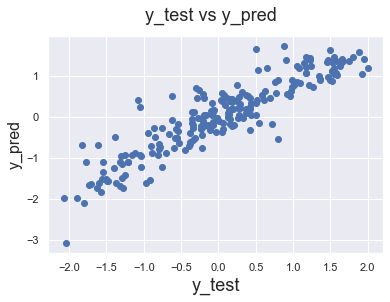

In [280]:
#we will plot the graph y_test vs y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred_m)
fig.suptitle('y_test vs y_pred', fontsize = 18)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)                          # y-label

# Calculate R2

In [281]:
from sklearn.metrics import r2_score
#lm.score(X_test_rfe5,y_test)

print("r2 score of train data :-", r2_score(y_true=y_train, y_pred=y_train_pred))
print("r2 score of test data :-" ,r2_score(y_true=y_test, y_pred=y_pred_m))

r2 score of train data :- 0.8506453443290036
r2 score of test data :- 0.8233224427085021


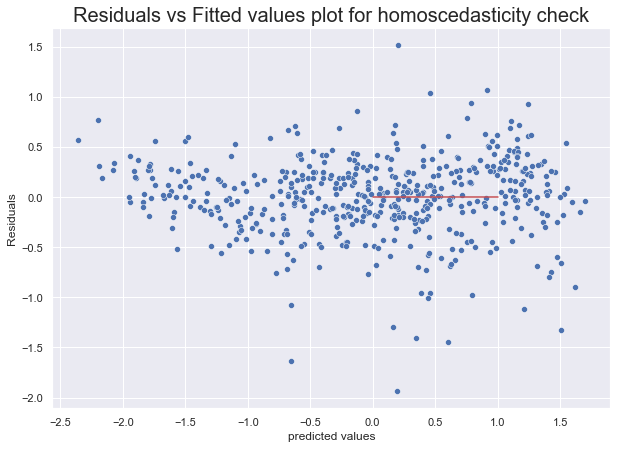

In [284]:
# Check for Homoscedasticity

plt.figure(figsize = [10,7])

res = y_train - y_train_pred
p = sns.scatterplot(y_train_pred,res)
plt.xlabel('predicted values')
plt.ylabel('Residuals')


p = sns.lineplot([0,1],[0,0],color='r')
p = plt.title('Residuals vs Fitted values plot for homoscedasticity check', fontsize = 20)

# Final expression/equation for analysed data is :-


0.4774*temp  +  1.0274*year_2019  +  0.3267 *month_Sep  +  0.1821*season_summer  +  0.4703*season_winter  -  0.4393*holiday  -  0.0967*humidity  -  0.1411*windspeed  -  0.2724*season_spring  -  0.1782*month_Dec  -  0.2031*month_Jan  -  0.2333*month_Jul  -  0.1883*month_Nov  -  0.2071*weekday_Sun  -  1.1438*weather_Light_Snow  -  0.2656*weather_Mist_Cloudy  -  0.4109 